<a href="https://colab.research.google.com/github/Ekiiio/week6/blob/main/wk6Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import yfinance as yf
import pandas as pd

def YahooData2returns(YahooData):
    adj_close_prices = YahooData['Adj Close'].dropna().values

    n = len(adj_close_prices)
    ratiovec = adj_close_prices[1:n] / adj_close_prices[:n-1]
    returns = ratiovec - 1
    return returns

def get_stock_data(symbol):
    data = yf.download(symbol, progress=False)
    return data


prices = get_stock_data('GS')

print(prices.head())

if not prices.empty and 'Adj Close' in prices.columns:
    pricevec = prices['Adj Close'].dropna().values
    returns = YahooData2returns(prices)
    if returns is not None:
        print(returns)


Price           Close       High        Low       Open    Volume
Ticker             GS         GS         GS         GS        GS
Date                                                            
1999-05-04  49.445190  54.275538  49.181717  53.397293  22320900
1999-05-05  48.566956  49.093903  46.546992  49.093903   7565700
1999-05-06  47.732616  48.742598  47.117845  47.776529   2905700
1999-05-07  52.079922  52.606869  46.898277  47.732610   4862300
1999-05-10  49.664738  51.640788  49.357352  51.552964   2589400


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Part 2 - given a set of returns calculate the VaR and allow for
# the notional amount to be an input variable "principal with" a default value of 1
# 2 points

def VaR(r, confidence, principal = 1):
    # This function returns the left tail value and displays a histogram
    # r = a vector of stock returns
    # principal = investment initial value
    var_percentile = np.percentile(r, (1 - confidence) * 100)
    out = principal * abs(var_percentile)
    # out = principal * positively stated value of r at the 1-alpha percentile
    return out

# Partial demonstration
def percent_var(r, confidence):
    # This function returns the left tail value and displays a histogram
    # r = a vector of stock percent returns
    # out = positively stated value of r at the 1-alpha percentile

    plt.hist(r, bins=50, alpha=0.75)
    plt.show()

    out = np.percentile(r, (1 - confidence) * 100)  # Calculate the percentile
    return abs(out)  # Return the absolute value of the calculated percentile

# Example tools: percentile
returns = np.random.normal(0, 1, 10000)
print(np.percentile(returns, 97.72))

# Unit test
r = np.random.normal(0.05, 0.03, 1000000)
probability2SD = norm.cdf(2)  # Probability under normal curve within 2 standard deviations

my_confidence = probability2SD
my_percent_var = percent_var(r, my_confidence )
print(np.round(my_percent_var, 2) == 0.01)

2.0031709355776317


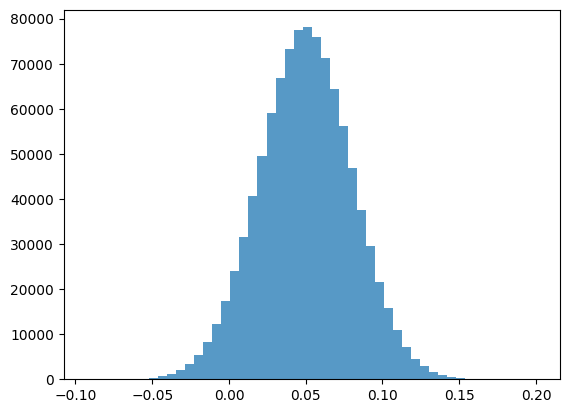

True


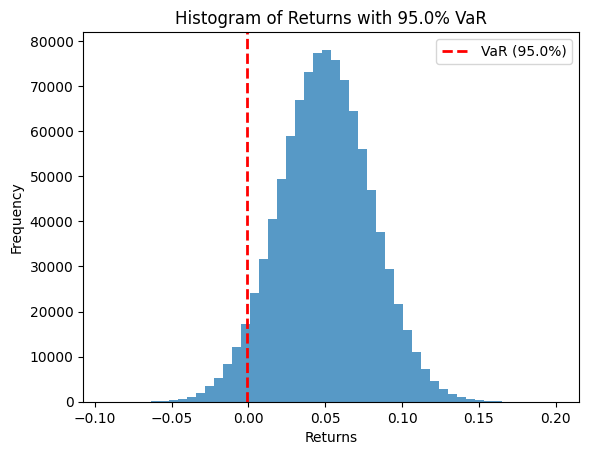

95.0% confidence level VaR (Principal $10000): $6.80


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Part 2 - given a set of returns calculate the VaR and allow for
# the notional amount to be an input variable "principal" with a default value of 1
# 2 points

def VaR(r, confidence, principal=1):
    # This function returns the left tail value and displays a histogram
    # r = a vector of stock returns
    # principal = investment initial value
    var_percentile = np.percentile(r, (1 - confidence) * 100)
    out = principal * abs(var_percentile)
    # out = principal * positively stated value of r at the 1-alpha percentile

    # Display histogram with VaR marked
    plt.hist(r, bins=50, alpha=0.75)
    plt.axvline(-var_percentile, color='red', linestyle='dashed', linewidth=2, label=f'VaR ({confidence * 100}%)')
    plt.xlabel("Returns")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Returns with {confidence * 100}% VaR")
    plt.legend()
    plt.show()

    return out

# Partial demonstration
def percent_var(r, confidence):
    # This function returns the left tail value and displays a histogram
    # r = a vector of stock percent returns
    # out = positively stated value of r at the 1-alpha percentile

    plt.hist(r, bins=50, alpha=0.75)
    plt.show()

    out = np.percentile(r, (1 - confidence) * 100)  # Calculate the percentile
    return abs(out)  # Return the absolute value of the calculated percentile

# Example tools: percentile
returns = np.random.normal(0, 1, 10000)
print(np.percentile(returns, 97.72))

# Unit test
r = np.random.normal(0.05, 0.03, 1000000)
probability2SD = norm.cdf(2)  # Probability under normal curve within 2 standard deviations

my_confidence = probability2SD
my_percent_var = percent_var(r, my_confidence)
print(np.round(my_percent_var, 2) == 0.01)

# Compute VaR
confidence_level = 0.95  # 95% confidence level
principal_amount = 10000  # Investment principal $10,000
VaR_value = VaR(r, confidence_level, principal_amount)

# Display results
print(f"{confidence_level * 100}% confidence level VaR (Principal ${principal_amount}): ${VaR_value:.2f}")




In [40]:
import numpy as np

# Part 3 - given a set of returns calculate the ES and allow for
# the notional amount to be an input variable "principal with" a default value of 1
# 2 points

def ES(losses, confidence=None, VaR=None, use_PnL=False):
    """
    Calculate the Expected Shortfall (ES) of losses.

    losses: array of positively stated loss values
    confidence: risk level (e.g., 0.99 for 99%)
    VaR: dollar value specifying the VaR threshold

    return Expected Shortfall as the average of losses exceeding VaR
    """
    if VaR is None:
        # If VaR is not provided, determine VaR based on the confidence percentile
        VaR = np.percentile(losses, 100 * confidence)

    # Calculate ES as the average of losses exceeding the VaR threshold
    es_value = np.mean(losses[losses > VaR])
    return es_value

# Unit test
u = np.random.uniform(0, 100, 100000)

# Test the ES function with an confidence of 0.8
es_confidence = ES(losses=u, confidence=0.8)
print('ES with confidence:', np.round(es_confidence, 0) == 90)

# Test the ES function with a VaR of 80
es_var = ES(losses=u, VaR=80)
print('ES with VaR:', np.round(es_var, 0) == 90)




ES with confidence: True
ES with VaR: True


In [69]:
import numpy as np

# Part 3 - given a set of returns calculate the ES and allow for
# the notional amount to be an input variable "principal" with a default value of 1
# 2 points

def ES(losses, confidence=None, VaR=None, principal=1, use_PnL=False):
    """
    Calculate the Expected Shortfall (ES) of losses.

    losses: array of positively stated loss values
    confidence: risk level (e.g., 0.99 for 99%)
    VaR: dollar value specifying the VaR threshold
    principal: investment initial value (default = 1)
    use_PnL: if True, treat losses as PnL (profit and loss) and convert to absolute losses

    return Expected Shortfall as the average of losses exceeding VaR
    """
    if use_PnL:
        losses = -losses  # Convert PnL to absolute losses

    if VaR is None:
        # If VaR is not provided, determine VaR based on the confidence percentile
        VaR = np.percentile(losses, 100 * confidence)

    # Calculate ES as the average of losses exceeding the VaR threshold
    es_value = np.mean(losses[losses > VaR])

    return es_value

# Unit test
u = np.random.uniform(0, 100, 100000)

# Test the ES function with an confidence of 0.8
es_confidence = ES(losses=u, confidence=0.8)
print('ES with confidence:', np.round(es_confidence, 0) == 90)

# Test the ES function with a VaR of 80
es_var = ES(losses=u, VaR=80)
print('ES with VaR:', np.round(es_var, 0) == 90)

# Test ES with a specified principal amount
principal_amount = 10000
es_with_principal = ES(losses=u, confidence=0.8) * principal_amount
print(f'Expected Shortfall with principal ${principal_amount}: ${es_with_principal:.2f}')

# Test ES with PnL data
pnl_data = np.random.normal(0, 1, 100000)
es_pnl = ES(losses=pnl_data, confidence=0.95, use_PnL=True)
print(f'ES with PnL data: {es_pnl:.2f}')




ES with confidence: True
ES with VaR: True
Expected Shortfall with principal $10000: $899151.11
ES with PnL data: 2.08


In [ ]:
# Problem 4 - 2 points
# Given a stock symbol get the returns and calculate the .99 %-ile VaR on a $1MM investment
def VaRStock(symbol, confidence=.95, principal = 1,start="2020-01-01", end="2025-02-01"):

  # Get prices using functions defined above above
  returns = YahooData2returns(symbol,start,end)


  # Feed returns into VaR function
  var=VaR(returns, confidence, principal = 1)

  return(var)

In [81]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Problem 4 - 2 points
# Given a stock symbol get the returns and calculate the .99 %-ile VaR on a $1MM investment

def YahooData2returns(symbol, start, end):
    stock_data = yf.download(symbol, start=start, end=end)

    if stock_data.empty:
        raise ValueError(f"Error: Unable to download {symbol} stock data. Please check the ticker or date range.")

    # Use 'Adj Close' if available, otherwise use 'Close'
    if 'Adj Close' in stock_data.columns:
        prices = stock_data['Adj Close']
    elif 'Close' in stock_data.columns:
        prices = stock_data['Close']
    else:
        raise ValueError("Error: Stock data does not contain 'Adj Close' or 'Close'. Please check the data format.")

    # Compute daily returns
    returns = prices.pct_change().dropna().values

    return returns

def VaR(r, confidence, principal=1):
    var_percentile = np.percentile(r, (1 - confidence) * 100)
    out = principal * abs(var_percentile)
    return out

def VaRStock(symbol, confidence=0.99, principal=1_000_000, start="2020-01-01", end="2025-02-01"):
    # Get returns using YahooData2returns function
    returns = YahooData2returns(symbol, start, end)

    # Feed returns into VaR function
    var = VaR(returns, confidence, principal)

    return var

# Symbol
symbol = "NVDA"
var_result = VaRStock(symbol)
print(f"99% Confidence Level VaR for {symbol} on a $1MM investment: ${var_result:.2f}")


[*********************100%***********************]  1 of 1 completed

99% Confidence Level VaR for NVDA on a $1MM investment: $77540.32


In [ ]:
# Problem 5 - 2 points
# Given a stock symbol get the returns and calculate the .975 %-ile ES (expected shortfall) on a $1MM investment

# Get returns for stock using function above

# Calculate .975 %-ile and seleect returns



In [85]:
import numpy as np
import yfinance as yf

# Function to fetch stock data and compute returns
def YahooData2returns(symbol, start, end):
    stock_data = yf.download(symbol, start=start, end=end)

    # Use 'Adj Close' if available, otherwise use 'Close'
    if 'Adj Close' in stock_data.columns:
        prices = stock_data['Adj Close']
    elif 'Close' in stock_data.columns:
        prices = stock_data['Close']
    else:
        raise ValueError("Error: Stock data does not contain 'Adj Close' or 'Close'.")

    # Compute daily returns
    returns = prices.pct_change().dropna().values

    return returns

# Function to compute Expected Shortfall (ES)
def ES(returns, confidence=0.975, principal=1_000_000):
    # Calculate VaR at (1 - confidence) percentile
    VaR = np.percentile(returns, (1 - confidence) * 100)

    # Compute ES as the average loss beyond VaR
    es_value = np.mean(returns[returns < VaR])

    # Scale ES by the investment principal
    return principal * abs(es_value)

# Function to get stock returns and compute ES
def ESStock(symbol, confidence=0.975, principal=1_000_000, start="2020-01-01", end="2025-02-01"):
    # Get returns for stock using function above
    returns = YahooData2returns(symbol, start, end)

    # Calculate ES
    es = ES(returns, confidence, principal)

    return es

# Symbol
symbol = "GOOG"
es_result = ESStock(symbol)
print(f"97.5% Confidence Level ES for {symbol} on a $1MM investment: ${es_result:.2f}")


[*********************100%***********************]  1 of 1 completed

97.5% Confidence Level ES for GOOG on a $1MM investment: $56717.47
